In [1]:
import pandas as pd

# Load financial data
data = pd.read_csv('financial_data.csv')

# Display first few rows to inspect the data
print(data.head())


   ID      Segment         Country     Product Discount Band  Units Sold  \
0   1    Corporate           Italy      Laptop           Low          52   
1   2    Corporate         Germany  Headphones           Low          93   
2   3    Corporate         Germany      Tablet           Low          15   
3   4  Home Office          France  Smartphone        Medium          72   
4   5    Corporate  United Kingdom  Smartphone           Low          61   

   Manufacturing Price  Sale Price  Gross Sales  Discounts      Sales   COGS  \
0                  113         788        40976    2048.80   38927.20   5876   
1                  275        1188       110484    5524.20  104959.80  25575   
2                  236         723        10845     542.25   10302.75   3540   
3                  233         494        35568    3556.80   32011.20  16776   
4                  108        1161        70821    3541.05   67279.95   6588   

     Profit      Date  Month Number Month Name  Year  Price  


In [2]:
# Check for missing values
print(data.isnull().sum())

# Drop rows with missing values, or fill them with a specific value
data = data.dropna()  # or data.fillna(0)


ID                     0
Segment                0
Country                0
Product                0
Discount Band          0
Units Sold             0
Manufacturing Price    0
Sale Price             0
Gross Sales            0
Discounts              0
Sales                  0
COGS                   0
Profit                 0
Date                   0
Month Number           0
Month Name             0
Year                   0
Price                  0
dtype: int64


In [3]:
# Check for incorrect data types
print(data.dtypes)

# Convert date column to datetime if necessary
data['Date'] = pd.to_datetime(data['Date'])

# Ensure numerical columns are of correct type
data['Price'] = pd.to_numeric(data['Price'], errors='coerce')


ID                       int64
Segment                 object
Country                 object
Product                 object
Discount Band           object
Units Sold               int64
Manufacturing Price      int64
Sale Price               int64
Gross Sales              int64
Discounts              float64
Sales                  float64
COGS                     int64
Profit                 float64
Date                    object
Month Number             int64
Month Name              object
Year                     int64
Price                    int64
dtype: object


In [4]:
# Summary statistics for numerical columns
print(data.describe())

# Calculate additional statistics (e.g., skewness, kurtosis)
print(data['Price'].skew())   # Skewness
print(data['Price'].kurt())   # Kurtosis


                ID   Units Sold  Manufacturing Price   Sale Price  \
count  1000.000000  1000.000000          1000.000000  1000.000000   
mean    500.500000    49.560000           172.848000   708.841000   
std     288.819436    29.287679            72.939009   292.815304   
min       1.000000     1.000000            50.000000   200.000000   
25%     250.750000    24.000000           109.000000   469.000000   
50%     500.500000    50.000000           172.000000   713.000000   
75%     750.250000    75.000000           234.250000   963.750000   
max    1000.000000    99.000000           299.000000  1198.000000   

         Gross Sales     Discounts         Sales          COGS        Profit  \
count    1000.000000   1000.000000    1000.00000   1000.000000   1000.000000   
mean    35189.708000   4031.063100   31158.64490   8598.810000  22559.834900   
std     26682.615627   4053.070558   23831.33331   6665.649079  20542.796357   
min       318.000000     24.600000     254.40000     54.00

In [5]:
# Calculate daily returns (if 'Price' represents stock price)
data['Return'] = data['Price'].pct_change()

# Summary statistics for returns
print(data['Return'].describe())


count    999.000000
mean       0.266945
std        0.918956
min       -0.820731
25%       -0.365679
50%        0.009191
75%        0.594954
max        4.691542
Name: Return, dtype: float64


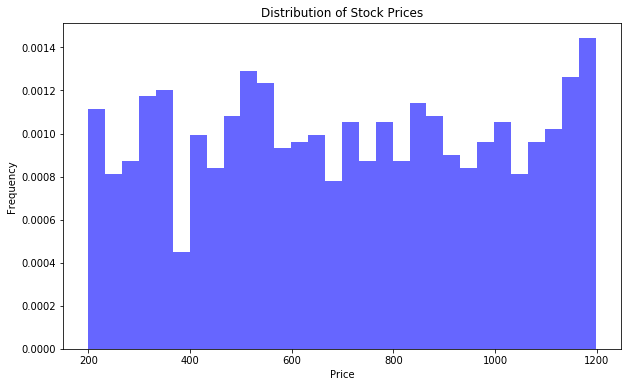

C:\Users\leno\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\leno\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


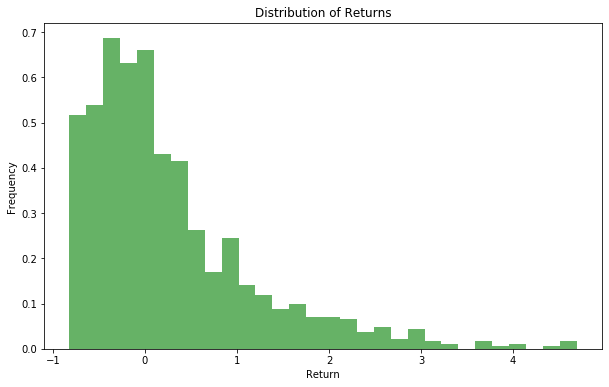

In [6]:
import matplotlib.pyplot as plt  # Correct import

# Plotting the histogram for stock prices
plt.figure(figsize=(10, 6))
plt.hist(data['Price'], bins=30, density=True, alpha=0.6, color='b')
plt.title('Distribution of Stock Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Plotting the distribution of returns
plt.figure(figsize=(10, 6))
plt.hist(data['Return'], bins=30, density=True, alpha=0.6, color='green')
plt.title('Distribution of Returns')
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.show()


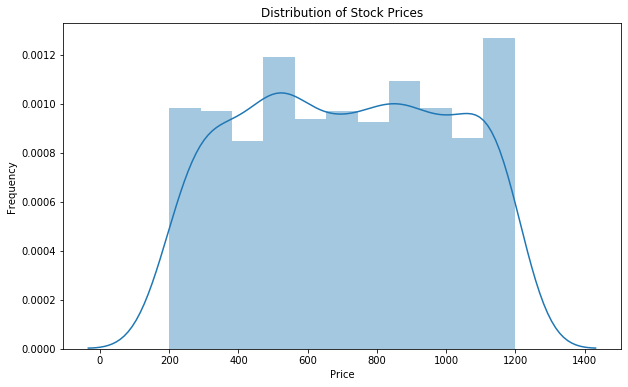

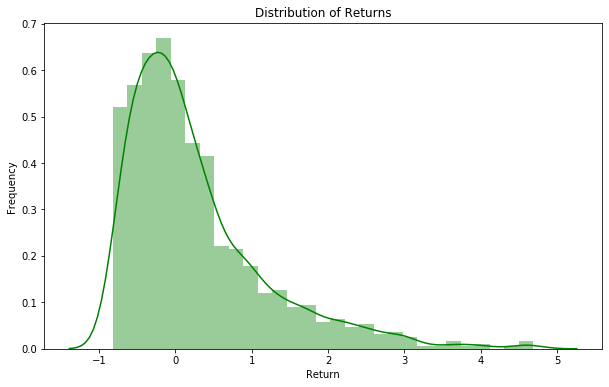

In [8]:
import seaborn as sns
# Plotting the distribution of stock prices (using distplot)
plt.figure(figsize=(10,6))
sns.distplot(data['Price'], kde=True)
plt.title('Distribution of Stock Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Plotting the distribution of returns (using distplot)
plt.figure(figsize=(10,6))
sns.distplot(data['Return'], kde=True, color='green')
plt.title('Distribution of Returns')
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.show()


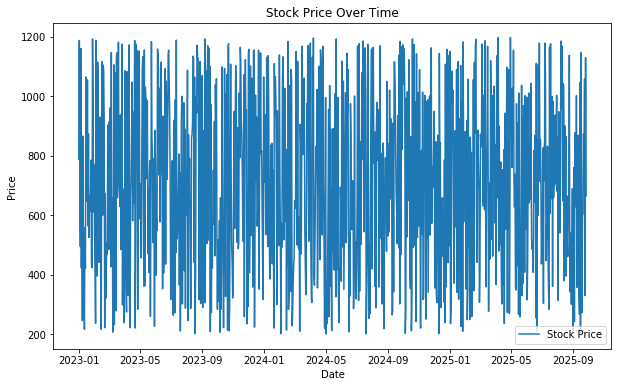

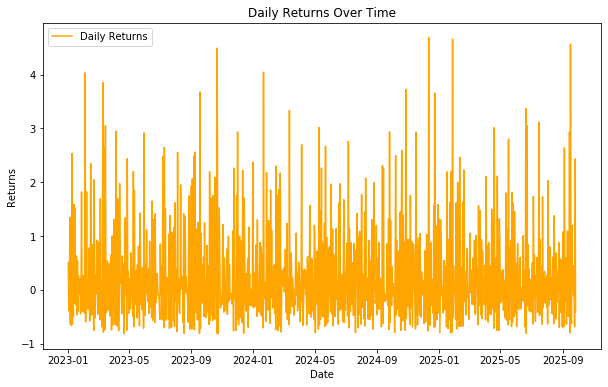

In [9]:
# Plotting the stock price over time
plt.figure(figsize=(10,6))
plt.plot(data['Date'], data['Price'], label='Stock Price')
plt.title('Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Plotting returns over time
plt.figure(figsize=(10,6))
plt.plot(data['Date'], data['Return'], label='Daily Returns', color='orange')
plt.title('Daily Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.show()


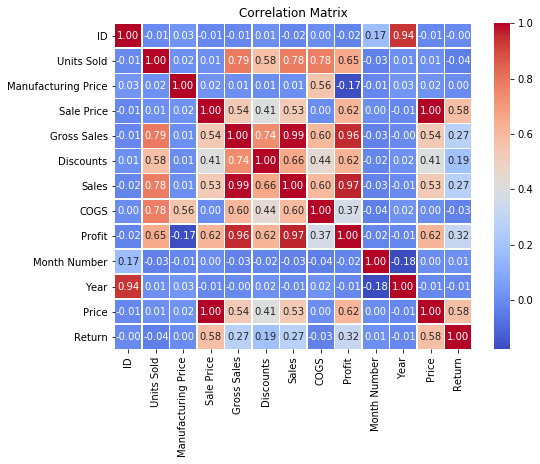

In [10]:
# Calculate correlation matrix
correlation_matrix = data.corr()

# Plotting a heatmap of the correlation matrix
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [11]:
data["volatility"]=data["Return"].rolling(window=30).std()
print(data["volatility"])

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
995    1.205130
996    1.201520
997    1.201201
998    1.258698
999    1.265213
Name: volatility, Length: 1000, dtype: float64


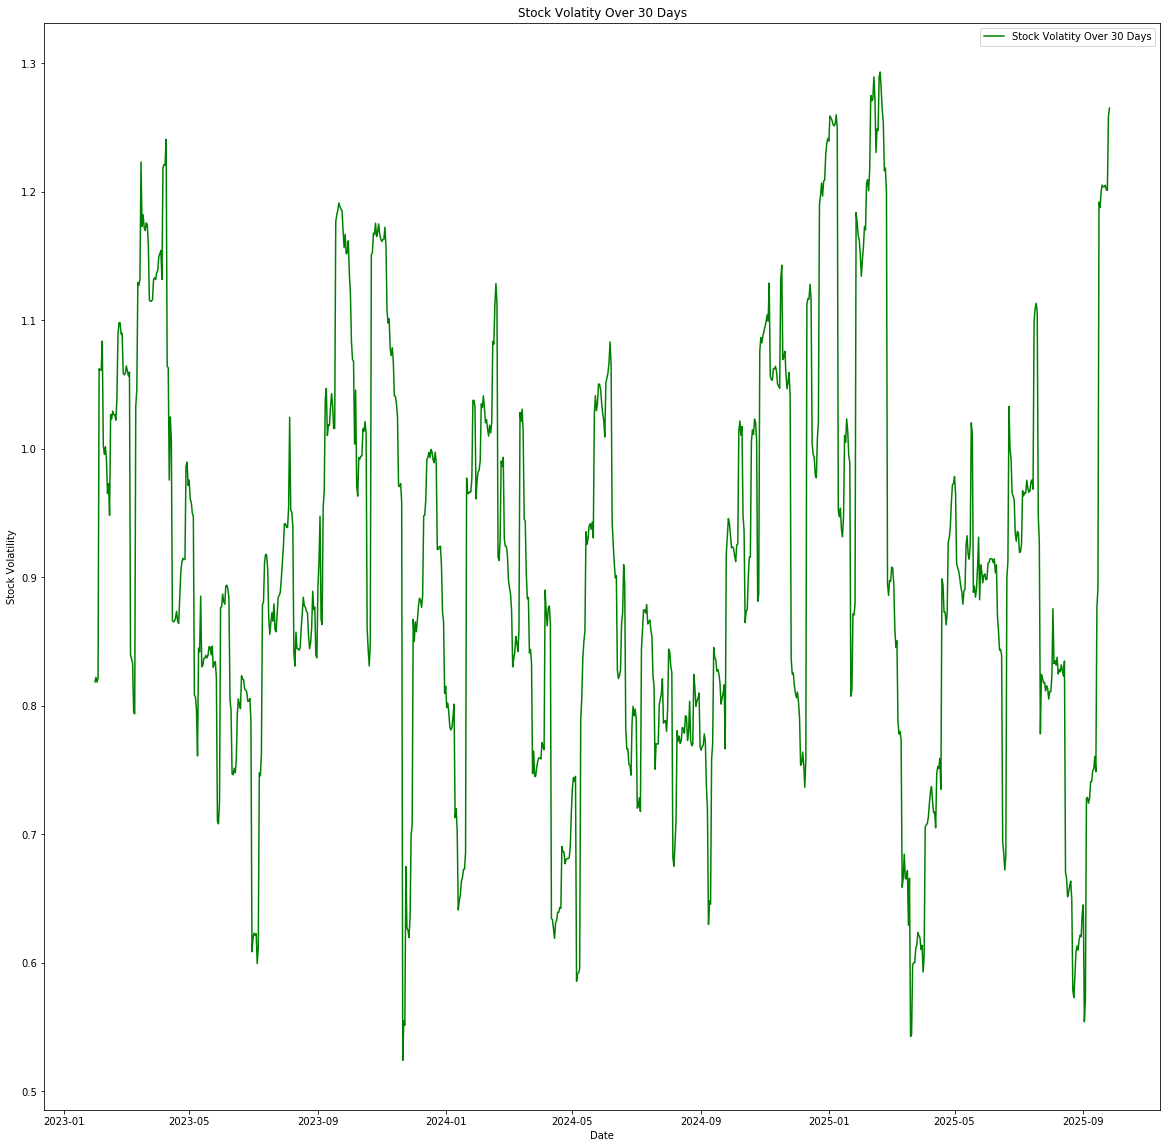

In [15]:
plt.figure(figsize=(20,20))
plt.plot(data["Date"],data["volatility"],label="Stock Volatity Over 30 Days",color="green")
plt.xlabel("Date")
plt.ylabel("Stock Volatility")
plt.title("Stock Volatity Over 30 Days")
plt.legend()
plt.show()

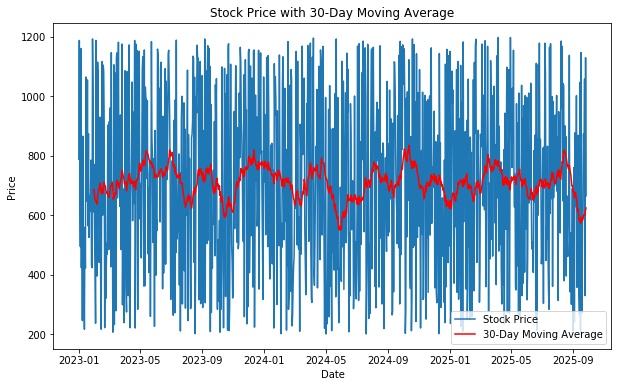

In [16]:
# Calculate moving average (e.g., 30-day)
data['30_Day_MA'] = data['Price'].rolling(window=30).mean()
# Plotting the stock price and moving average
plt.figure(figsize=(10,6))
plt.plot(data['Date'], data['Price'], label='Stock Price')
plt.plot(data['Date'], data['30_Day_MA'], label='30-Day Moving Average', color='red')
plt.title('Stock Price with 30-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()
